## Final Project Submission

Please fill out:
* Student name: Kiganane Myles Mulusa
* Student pace: part time 06
* Scheduled project review date/time: 18/02/2024
* Instructor name: Samuel G. Mwangi
* Blog post URL: https://github.com/myles-mulusa


# Microsoft Movies Analysis Project

## Business Problem & Understanding
Microsoft wants to start creating movies like they have seen other big companies do. They have a studio but do not know how to start creating them.

The project aims to assist Microsoft in making informed decisions about entering the movie production industry by providing insights into popular genres, profitability, and audience preferences.

Being tasked to help them solve this problem, I will aim to answer the following questions:
1. How many movies are being made in each genre?
2. Which genres of movies are the most profitable?
3. What genres of movies are highly rated and most popular among the audience?

Stakeholders include Microsoft executives, film production teams, and market analysts. They can use the analysis to make strategic decisions, prioritize genres, and enhance the success of Microsoft's entry into the movie industry.

## Understanding the Data
The data for this analysis have come from:

1. The Movie Database (movie title, audience rating)
2. IMDb (movie title, release year, genres, and audience rating)
3. Box Office Mojo (movie title, gross earnings)

The target variables for this analysis are release year, gross earnings, genres, and audience ratings. 

## Data Preparation
For the data to be ready for exploratory analysis, we need to combine the four datasets into one DataFrame.

In [1]:
# Initial imports of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Import the data from The Movie Database
tmdb_movies = pd.read_csv("tmdb.movies.csv", index_col = 0) # we specify the column to avoid duplicate values

In [9]:
# Import the data from IMDb
imdb_title_basics = pd.read_csv("imdb.title.basics.csv")
imdb_title_ratings = pd.read_csv("imdb.title.ratings.csv")

In [10]:
# Import the data from Box Office Mojo
bom_movie_gross = pd.read_csv("bom.movie_gross.csv")

In [12]:
# Display the structure of each dataset
print("tmdb_movies:", tmdb_movies.shape)
print("imdb_title_basics:", imdb_title_basics.shape)
print("imdb_title_ratings:", imdb_title_ratings.shape)
print("bom_movie_gross:", bom_movie_gross.shape)

tmdb_movies: (26517, 9)
imdb_title_basics: (146144, 6)
imdb_title_ratings: (73856, 3)
bom_movie_gross: (3387, 5)


We combine the datasets based on a common identifier, such as movie titles or IDs as follows:

In [29]:
# Combine datasets based on common columns (e.g., movie titles)
# Choose the appropriate merge method: inner, outer, left, right
merged_data = pd.merge(tmdb_movies, imdb_title_basics, how='inner', left_on='title', right_on='primary_title')
merged_data = pd.merge(merged_data, imdb_title_ratings, how='inner', on='tconst')
merged_data = pd.merge(merged_data, bom_movie_gross, how='inner', left_on='title', right_on='title')
merged_data

,genre_ids,id,original_language,original_title_x,popularity,release_date,title,vote_average,vote_count,tconst,...,original_title_y,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,...,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",8.1,611299,P/DW,217600000.0,277300000,2010
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,...,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,Par.,312400000.0,311500000,2010
2,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,tt1375666,...,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,WB,292600000.0,535700000,2010
3,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,tt0435761,...,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,BV,415000000.0,652000000,2010
4,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,tt1323594,...,Despicable Me,2010,95.0,"Animation,Comedy,Family",7.7,464511,Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,[18],473262,it,"Nico, 1988",3.789,2018-07-04,"Nico, 1988",7.3,40,tt7186092,...,"Nico, 1988",2017,93.0,"Biography,Drama,Music",6.8,1007,Magn.,73300.0,NaN,2018
3293,[99],465871,en,Maria by Callas,3.184,2018-11-02,Maria by Callas,7.6,11,tt7364566,...,Maria by Callas,2017,119.0,"Biography,Documentary,Music",7.2,867,SPC,1300000.0,NaN,2018
3294,"[28, 12, 16]",332718,en,Bilal: A New Breed of Hero,2.707,2018-02-02,Bilal: A New Breed of Hero,6.8,54,tt3576728,...,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation",8.0,16854,VE,491000.0,1700000,2018
3295,[35],498919,es,La Boda de Valentina,2.550,2018-02-09,La Boda de Valentina,6.3,7,tt4823538,...,La Boda de Valentina,2018,107.0,"Comedy,Romance",4.7,523,PNT,2800000.0,NaN,2018


In [30]:
# Display the structure of the merged dataset
print("Merged Data:", merged_data.shape)

# Now, 'merged_data' contains all the information from the four datasets

Merged Data: (3297, 21)


In [32]:
# Now, you can create a new DataFrame from the merged data
df = pd.DataFrame(merged_data)

# Display the structure of the new DataFrame
print("New DataFrame:", df.shape)

New DataFrame: (3297, 21)


Make sure to check the structure and contents of the new DataFrame using functions like head(), info(), or describe() to ensure that the data has been loaded correctly.

In [33]:
# Display the first five rows of the new DataFrame
print(df.head(5))

             genre_ids     id original_language          original_title_x  \
0  [14, 12, 16, 10751]  10191                en  How to Train Your Dragon   
1        [12, 28, 878]  10138                en                Iron Man 2   
2        [28, 878, 12]  27205                en                 Inception   
3      [16, 10751, 35]  10193                en               Toy Story 3   
4      [16, 10751, 35]  20352                en             Despicable Me   

   popularity release_date                     title  vote_average  \
0      28.734   2010-03-26  How to Train Your Dragon           7.7   
1      28.515   2010-05-07                Iron Man 2           6.8   
2      27.920   2010-07-16                 Inception           8.3   
3      24.445   2010-06-17               Toy Story 3           7.7   
4      23.673   2010-07-09             Despicable Me           7.2   

   vote_count     tconst  ...          original_title_y start_year  \
0        7610  tt0892769  ...  How to Train Yo

In [35]:
# Display the metadata information about the new DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297 entries, 0 to 3296
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          3297 non-null   object 
 1   id                 3297 non-null   int64  
 2   original_language  3297 non-null   object 
 3   original_title_x   3297 non-null   object 
 4   popularity         3297 non-null   float64
 5   release_date       3297 non-null   object 
 6   title              3297 non-null   object 
 7   vote_average       3297 non-null   float64
 8   vote_count         3297 non-null   int64  
 9   tconst             3297 non-null   object 
 10  primary_title      3297 non-null   object 
 11  original_title_y   3297 non-null   object 
 12  start_year         3297 non-null   int64  
 13  runtime_minutes    3235 non-null   float64
 14  genres             3288 non-null   object 
 15  averagerating      3297 non-null   float64
 16  numvotes           3297 

### Size of the DataFrame
The dataset contains 3,297 records with various features such as genre, popularity, ratings, and financials. 

## Data Cleaning
In this section, we check the data to see whether there are any duplicate values, irrelevant columns, highly correlated columns and missing values. This ensures that the data we will use for analyses is free of any errors and is relevant to the business problem.

In [39]:
# Display column names and data types
print(df.dtypes)

# Display the number of missing values in each column
print(df.isnull().sum())

# Display unique values in each column
for col in df.columns:
    print(col, df[col].nunique())

genre_ids             object
id                     int64
original_language     object
original_title_x      object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
tconst                object
primary_title         object
original_title_y      object
start_year             int64
runtime_minutes      float64
genres                object
averagerating        float64
numvotes               int64
studio                object
domestic_gross       float64
foreign_gross         object
year                   int64
dtype: object
genre_ids               0
id                      0
original_language       0
original_title_x        0
popularity              0
release_date            0
title                   0
vote_average            0
vote_count              0
tconst                  0
primary_title           0
original_title_y        0
start_year              0
runtime_minutes        62
genres       

From this, we can see that some columns like foreign_gross, runtime_minutes and genres have missing values. We shall therefore check the percentage of the missing values as follows:

In [40]:
# Calculate the percentage of missing values
percentage_missing = (df.isnull().sum() / len(df)) * 100

# Display the columns and their respective missing value percentages
print(percentage_missing)

genre_ids             0.000000
id                    0.000000
original_language     0.000000
original_title_x      0.000000
popularity            0.000000
release_date          0.000000
title                 0.000000
vote_average          0.000000
vote_count            0.000000
tconst                0.000000
primary_title         0.000000
original_title_y      0.000000
start_year            0.000000
runtime_minutes       1.880497
genres                0.272975
averagerating         0.000000
numvotes              0.000000
studio                0.000000
domestic_gross        0.879588
foreign_gross        36.821353
year                  0.000000
dtype: float64


For columns with a small percentage of missing values like runtime_minutes, genres and domestic_gross, we consider inputting the values as they are important to our analysis. However, for the foreign_gross column, we consider dropping it due to the high percentage of missing values that may affect our analysis negatively.

In [41]:
# Impute missing values for runtime_minutes, genres, and domestic_gross
df['runtime_minutes'].fillna(df['runtime_minutes'].mean(), inplace=True)
df['genres'].fillna("Unknown", inplace=True)  # Replace with a suitable category
df['domestic_gross'].fillna(df['domestic_gross'].mean(), inplace=True)

# Drop the foreign_gross column
df.drop('foreign_gross', axis=1, inplace=True)

In [44]:
# Re-evaluate the dataset
print(df.dtypes)
print(df.isnull().sum())

genre_ids             object
id                     int64
original_language     object
original_title_x      object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
tconst                object
primary_title         object
original_title_y      object
start_year             int64
runtime_minutes      float64
genres                object
averagerating        float64
numvotes               int64
studio                object
domestic_gross       float64
year                   int64
dtype: object
genre_ids            0
id                   0
original_language    0
original_title_x     0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
tconst               0
primary_title        0
original_title_y     0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
studio         

### Limitations of the DataFrame
Data limitations include:
1. Missing values in some columns.
2. Potential biases in ratings.
3. Variations in financial reporting.

These limitations may impact the precision of recommendations.

## Exploratory Data Analysis & Visualizations
Following the data preparation and successful data cleaning, we proceed to perform analyses and create meaningful visualizations to answer the questions outlined in the business problem. 

### Distribution of Numerical Features
This is a crucial step in exploratory data analysis since it helps us understand the central tendency, spread, and shape of the data in each numerical column of the dataset in order to draw conclusions from the results.

#### Descriptive Statistics
This includes mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values.

In [45]:
# Display the summary statistics of the new DataFrame (e.g. mean, standard deviation, min & max for numerical columns.)
print(df.describe())

                  id   popularity  vote_average    vote_count   start_year  \
count    3297.000000  3297.000000   3297.000000   3297.000000  3297.000000   
mean   224760.264180     9.573290      6.361146   1284.712466  2013.878071   
std    140842.029761     7.240195      1.018043   2336.908539     2.450294   
min      1771.000000     0.600000      0.000000      1.000000  2010.000000   
25%     82631.000000     5.310000      5.800000     59.000000  2012.000000   
50%    230179.000000     8.459000      6.400000    350.000000  2014.000000   
75%    339419.000000    12.349000      7.000000   1357.000000  2016.000000   
max    574534.000000    80.773000     10.000000  22186.000000  2019.000000   

       runtime_minutes  averagerating      numvotes  domestic_gross  \
count      3297.000000    3297.000000  3.297000e+03    3.297000e+03   
mean        105.728903       6.440370  6.653646e+04    3.556817e+07   
std          19.002022       1.029176  1.279483e+05    7.220805e+07   
min          

##### Key Observations
The summary statistics offer valuable insights into the numerical features of the DataFrame. Here are some key observations:

Popularity:

This column has a mean of 9.57, with a minimum of 0.6 and a maximum of 80.77. The distribution seems to be positively skewed, as the mean is greater than the median.

Vote Average:

This column has a mean of approximately 6.36, with values ranging from 0 to 10. It seems that the majority of movies have relatively high average votes.

Vote Count:

This column shows a wide range of counts, with a mean of approximately 1284.71 and a maximum of 22186. This suggests varying levels of audience engagement with different movies.

Start Year:

This column indicates that the dataset spans from the year 2010 to 2019.

Runtime Minutes:

This column has a mean of approximately 105.73, with values ranging from 3 to 272. It provides information about the duration of movies.

Average Rating:

This column has a mean of approximately 6.44, indicating a moderately positive average rating.

Number of Votes:

This column displays a wide range, with a mean of approximately 66,536. This suggests varying levels of audience engagement.

Domestic Gross:

This column represents the gross earnings in domestic markets ranging from 100 to 700,100,000 dollars.

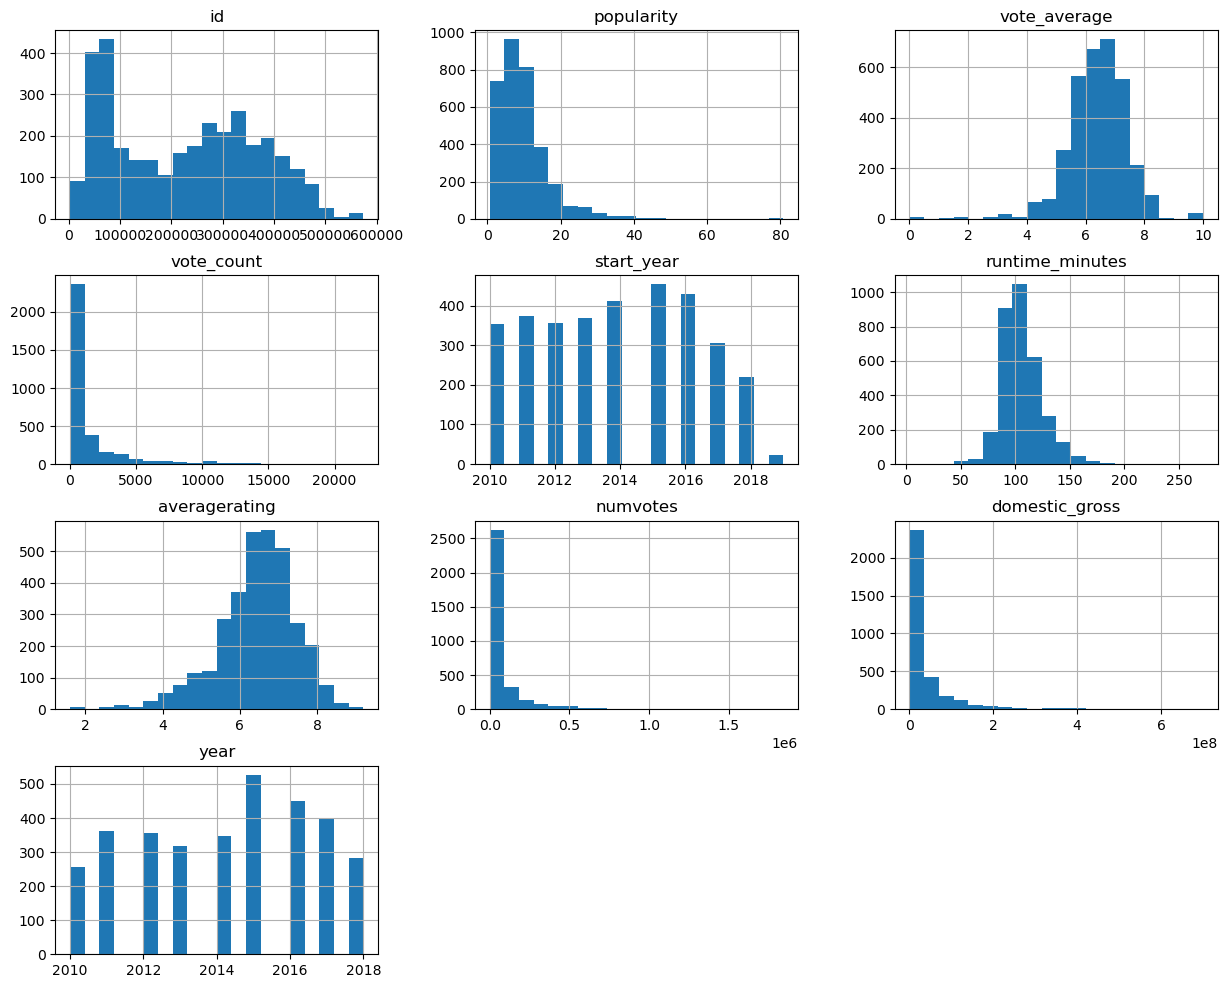

In [46]:
# Plotting the distribution
df.hist(bins=20, figsize=(15, 12))
plt.show()

In [47]:
# Interpret the distributions of the numerical columns
'''
Id distribution:

The id column serves as an identifier.

Popularity distribution:

It is positively skewed, with a majority of movies having relatively low popularity scores. There are also a few movies with very high popularity scores, creating a right-skewed distribution.

Vote Average distribution:

It appears to be relatively normally distributed, centered around a mean of approximately 6.36. Most movies receive average votes between 5 and 7.

Vote Count distribution:

It is heavily right-skewed, indicating that a significant number of movies have low vote counts, while a few movies have exceptionally high vote counts.

Start Year distribution:

It shows that movies in the dataset are spread across the years 2010 to 2019.

Runtime Minutes distribution:

It is slightly right-skewed, suggesting that the majority of movies have a runtime between 90 and 120 minutes.

Average Rating distribution:

It is relatively normally distributed, centered around a mean of approximately 6.44. Most movies have average ratings between 6 and 7.

Number of Votes distribution:

It is heavily right-skewed, indicating that the majority of movies have a relatively low number of votes, while a few movies have received a high number of votes.

Domestic Gross distribution:

It is heavily right-skewed, with a concentration of movies having lower gross earnings. There are a few movies with very high domestic gross earnings.

Year distribution:

It shows the distribution of movie releases over the years 2010 to 2018.
'''

'\nId distribution:\n\nThe id column serves as an identifier.\n\nPopularity distribution:\n\nIt is positively skewed, with a majority of movies having relatively low popularity scores. There are also a few movies with very high popularity scores, creating a right-skewed distribution.\n\nVote Average distribution:\n\nIt appears to be relatively normally distributed, centered around a mean of approximately 6.36. Most movies receive average votes between 5 and 7.\n\nVote Count distribution:\n\nIt is heavily right-skewed, indicating that a significant number of movies have low vote counts, while a few movies have exceptionally high vote counts.\n\nStart Year distribution:\n\nIt shows that movies in the dataset are spread across the years 2010 to 2019.\n\nRuntime Minutes distribution:\n\nIt is slightly right-skewed, suggesting that the majority of movies have a runtime between 90 and 120 minutes.\n\nAverage Rating distribution:\n\nIt is relatively normally distributed, centered around a mea

### Categorical Features
Here, we count unique values in each categotical column so as to be able to know the number of different genres of movies present in the dataset. This would enable us to know how to handle the columns during analysis.

In [48]:
# Count of unique values in each categorical column
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}: {df[col].nunique()}")
    print(df[col].value_counts())


genre_ids: 677
genre_ids
[18]                           439
[35]                           158
[99]                           143
[35, 18]                       113
[18, 10749]                    102
                              ... 
[27, 35, 10749]                  1
[28, 18, 27, 878, 53]            1
[12, 28, 878, 53]                1
[28, 12, 16, 35, 10751, 14]      1
[28, 12, 16]                     1
Name: count, Length: 677, dtype: int64

original_language: 40
original_language
en    2658
fr     134
hi      64
zh      54
es      51
ja      37
de      35
ko      27
no      26
ru      26
he      20
it      18
pt      15
da      15
ro      14
cn      13
sv      11
th       8
pl       7
el       7
fa       7
uk       7
nl       6
tr       5
ar       5
hu       4
ta       4
eu       3
is       3
vi       2
ka       2
et       1
xx       1
lt       1
mi       1
fi       1
tl       1
te       1
ca       1
id       1
Name: count, dtype: int64

original_title_x: 2249
original_title_x
Ed

In [49]:
# Interpret categorical columns features
'''
'genre_ids':

There are 677 unique values in this column representing the genre of each movie.
The most frequent genre is [18] (Drama), occurring 439 times.

'original_language':

There are 40 unique values in this column, representing the original language of the movies.
English (en) is the most common language, occurring 2658 times.

'original_title_x', 'title', 'original_title_y':

There are 2249, 2207, and 2321 unique values in original_title_x, title, and original_title_y, respectively.

'release_date':

There are 973 unique values in this column.
Some dates have multiple occurrences, indicating movies released on the same date.

'genres':

There are 303 unique values in this column, representing the genres of movies.
The most frequent genre is "Drama" occurring 326 times.

'studio':

There are 189 unique values in this column, representing the movie studios.
Studios like "Uni." (Universal Pictures), "Fox" (20th Century Fox), and "IFC" (IFC Films) have multiple occurrences.

'''

'\n\'genre_ids\':\n\nThere are 677 unique values in this column representing the genre of each movie.\nThe most frequent genre is [18] (Drama), occurring 439 times.\n\n\'original_language\':\n\nThere are 40 unique values in this column, representing the original language of the movies.\nEnglish (en) is the most common language, occurring 2658 times.\n\n\'original_title_x\', \'title\', \'original_title_y\':\n\nThere are 2249, 2207, and 2321 unique values in original_title_x, title, and original_title_y, respectively.\n\n\'release_date\':\n\nThere are 973 unique values in this column.\nSome dates have multiple occurrences, indicating movies released on the same date.\n\n\'genres\':\n\nThere are 303 unique values in this column, representing the genres of movies.\nThe most frequent genre is "Drama" occurring 326 times.\n\n\'studio\':\n\nThere are 189 unique values in this column, representing the movie studios.\nStudios like "Uni." (Universal Pictures), "Fox" (20th Century Fox), and "IFC"

### Correlation Analysis
This analysis helps identify relationships between different variables. It indicates whether and how strongly two variables are related. This can be valuable for understanding the patterns and dependencies within the DataFrame.

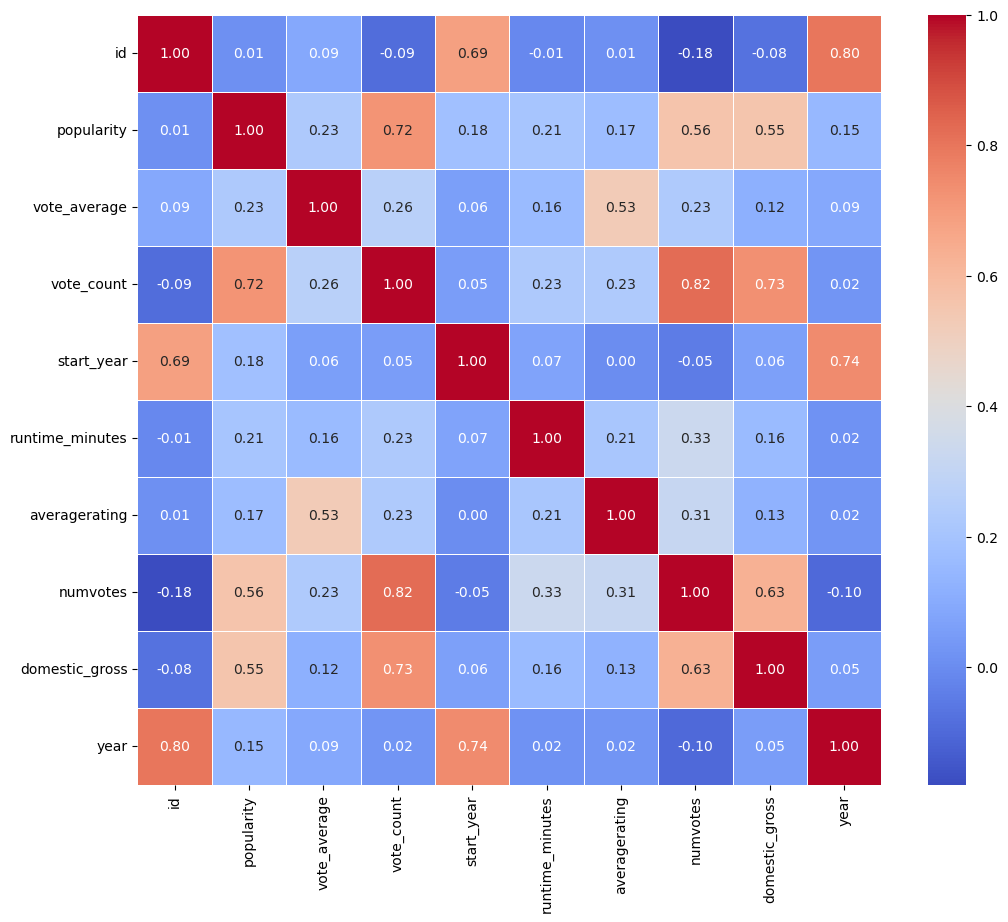

In [51]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [52]:
# Interpret the Heatmap
'''
Color Intensity:

Darker colors (e.g., dark blue or dark red) represent a stronger correlation.
Lighter colors (e.g., light blue or light red) indicate a weaker correlation.

Direction of Correlation:

Positive correlation: A high positive correlation is represented by a color closer to dark red. This means that as one variable increases, the other tends to increase as well.
Negative correlation: A high negative correlation is represented by a color closer to dark blue. This means that as one variable increases, the other tends to decrease.

Correlation Coefficient Values:

The numerical values inside each cell indicate the correlation coefficient between the corresponding pair of variables. The coefficient ranges from -1 to 1.
1: Perfect positive correlation
-1: Perfect negative correlation
0: No correlation

There are no numerical variables that are perfectly positively or negatively correlated to each other showing independence in the relationships between the variables.
However, there are variables that are not correlated (0.00) with the other variables such as the 'start-year' and averagerating.

'''

"\nColor Intensity:\n\nDarker colors (e.g., dark blue or dark red) represent a stronger correlation.\nLighter colors (e.g., light blue or light red) indicate a weaker correlation.\n\nDirection of Correlation:\n\nPositive correlation: A high positive correlation is represented by a color closer to dark red. This means that as one variable increases, the other tends to increase as well.\nNegative correlation: A high negative correlation is represented by a color closer to dark blue. This means that as one variable increases, the other tends to decrease.\n\nCorrelation Coefficient Values:\n\nThe numerical values inside each cell indicate the correlation coefficient between the corresponding pair of variables. The coefficient ranges from -1 to 1.\n1: Perfect positive correlation\n-1: Perfect negative correlation\n0: No correlation\n\nThere are no numerical variables that are perfectly positively or negatively correlated to each other showing independence in the relationships between the va

### Genre Analysis
This analysis is crucial in providing valuable insights into audience preferences, industry trends, and potential profitability, which can guide Microsoft to make informed decisions about their movie production strategy.

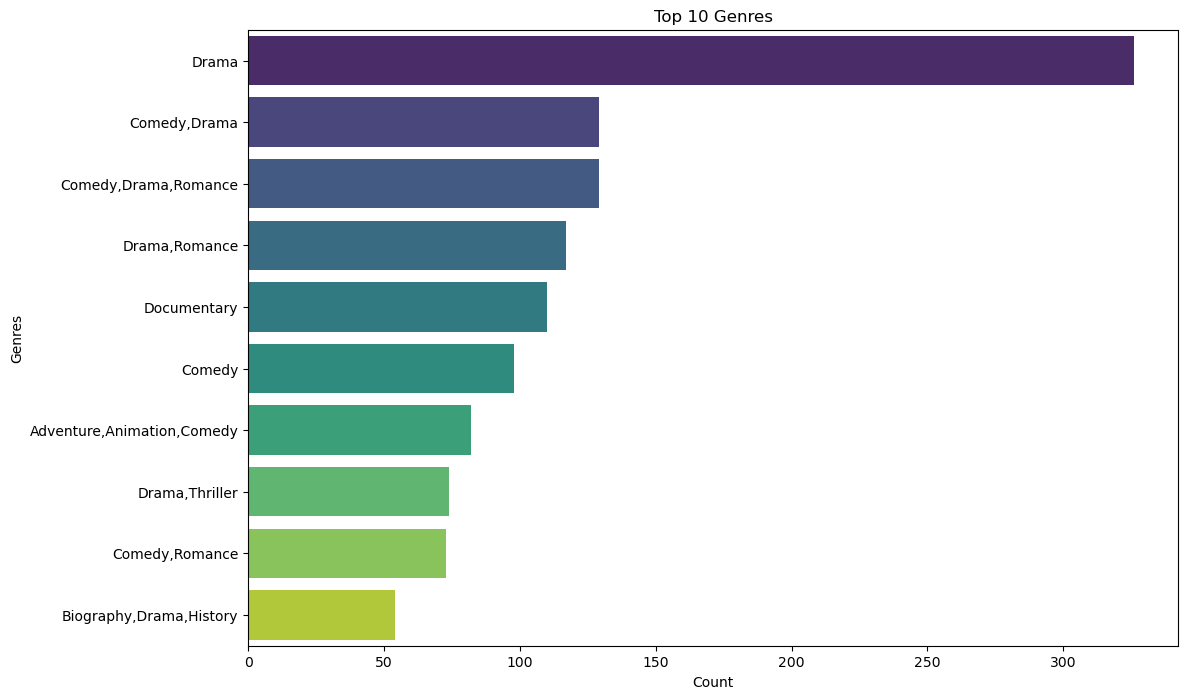

In [53]:
# Genre distribution
genres_count = df['genres'].value_counts()
top_genres = genres_count.head(10)

# Bar plot for top genres
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

In [54]:
# Interpret the bar plot
'''

The genre "Drama" appears to be the most prevalent among the top 10 genres, with the highest count. This suggests that drama is a widely produced genre in the dataset.
On the other hand, Biography, Drama, History are the less prevalent among the genres with the lowest count.

'''

'\n\nThe genre "Drama" appears to be the most prevalent among the top 10 genres, with the highest count. This suggests that drama is a widely produced genre in the dataset.\nOn the other hand, Biography, Drama, History are the less prevalent among the genres with the lowest count.\n\n'

### Domestic Gross Vs. Other Features Scatter Plots
They can provide visual insights into relationships between different numerical features. They help to uncover trends and patterns in the dataset.

Here, we are exploring the relationships between the domestic gross earnings and other numerical features like popularity, vote average, and runtime minutes.

/Users/unclem/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


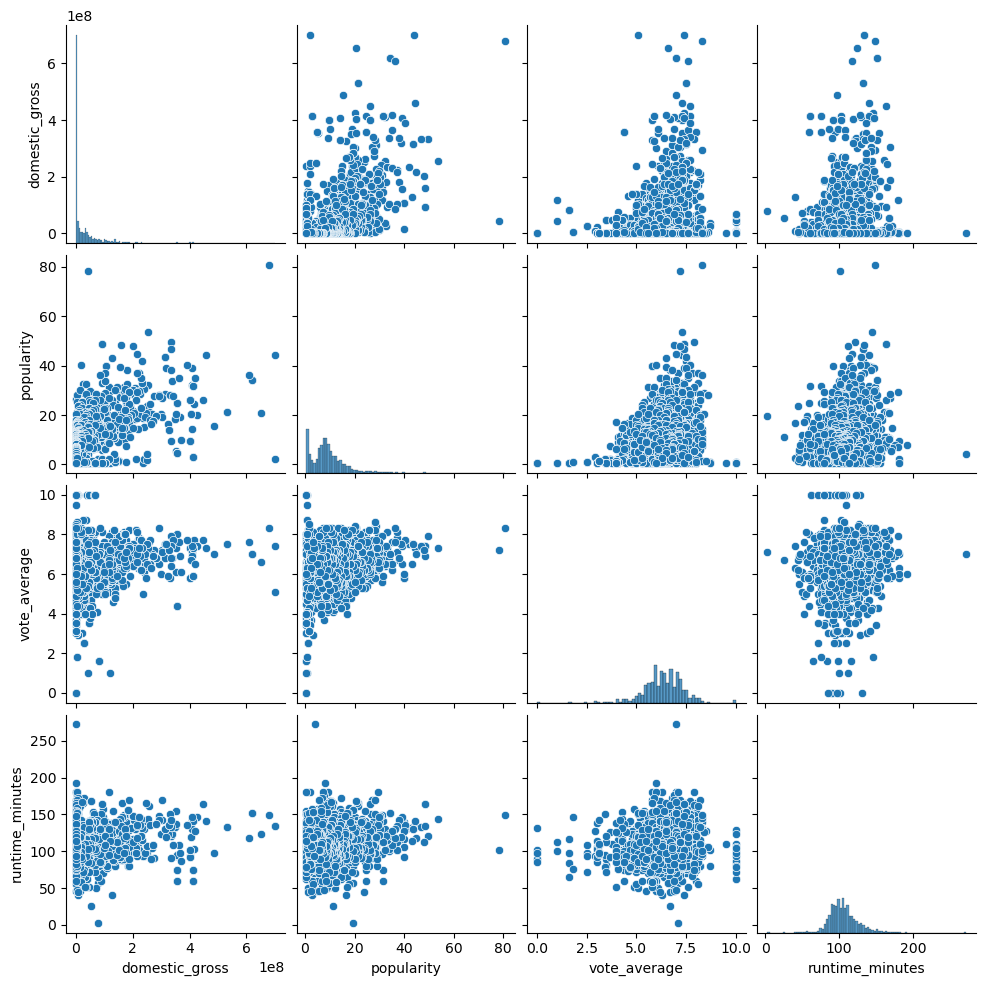

In [55]:
# Scatter plots for domestic gross vs. other numerical features
sns.pairplot(df, vars=['domestic_gross', 'popularity', 'vote_average', 'runtime_minutes'])
plt.show()

In [56]:
# Interpret the scatter plots above
'''

Domestic Gross vs. Popularity:

There is a positive correlation between domestic gross and popularity, indicating that movies with higher popularity tend to have higher domestic earnings.
The points on the scatter plot show an upward trend, suggesting that movies with higher popularity scores generally perform better in terms of domestic gross earnings.

Domestic Gross vs. Vote Average:

There appears to be a positive correlation between domestic gross and vote average, indicating that movies with higher average votes also tend to have higher domestic earnings.
The scatter plot shows a general trend of higher domestic gross for movies with higher average vote ratings.

Domestic Gross vs. Runtime Minutes:

There is no clear linear relationship between domestic gross and runtime minutes based on the scatter plot.
Movies with varying runtime minutes can have both high and low domestic gross earnings, suggesting that the impact of runtime on earnings may not follow a simple pattern.

'''

'\n\nDomestic Gross vs. Popularity:\n\nThere is a positive correlation between domestic gross and popularity, indicating that movies with higher popularity tend to have higher domestic earnings.\nThe points on the scatter plot show an upward trend, suggesting that movies with higher popularity scores generally perform better in terms of domestic gross earnings.\n\nDomestic Gross vs. Vote Average:\n\nThere appears to be a positive correlation between domestic gross and vote average, indicating that movies with higher average votes also tend to have higher domestic earnings.\nThe scatter plot shows a general trend of higher domestic gross for movies with higher average vote ratings.\n\nDomestic Gross vs. Runtime Minutes:\n\nThere is no clear linear relationship between domestic gross and runtime minutes based on the scatter plot.\nMovies with varying runtime minutes can have both high and low domestic gross earnings, suggesting that the impact of runtime on earnings may not follow a simp

### Release Year Analysis
The line plot "Number of Movies Released Each Year" illustrates the distribution of movies over the years.

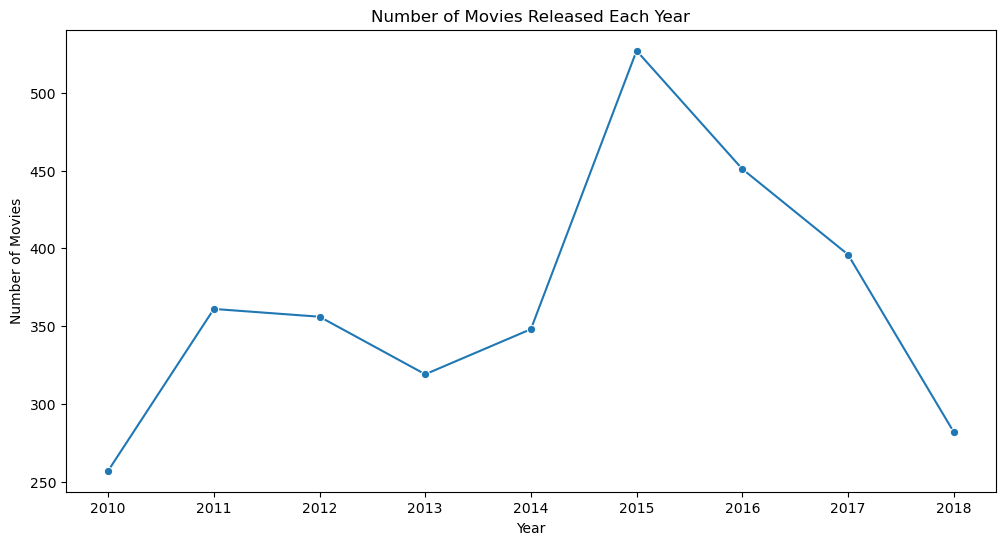

In [57]:
# Number of movies released each year
movies_per_year = df['year'].value_counts().sort_index()

# Line plot for movies per year
plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [58]:
# Interpret the line plot
'''

The plot shows the trend in the number of movies released annually.
It allows us to observe any patterns, trends, or fluctuations in movie production over the years.


'''

'\n\nThe plot shows the trend in the number of movies released annually.\nIt allows us to observe any patterns, trends, or fluctuations in movie production over the years.\n\n\n'

#### Key Observations from the line plot
There seems to be an overall increasing trend in the number of movies released each year, with some variations.

There could be a peak in certain years, indicating potentially significant periods for the movie industry.

Understanding these trends could be valuable for Microsoft to make strategic decisions regarding the timing and volume of movie releases.

### Audience Ratings Vs. Genres
This analysis focuses on meeting the customer preferences. It is a valuable tool for decision-makers in the film industry, guiding content creation, marketing strategies, and overall business planning based on the needs of their target audience.

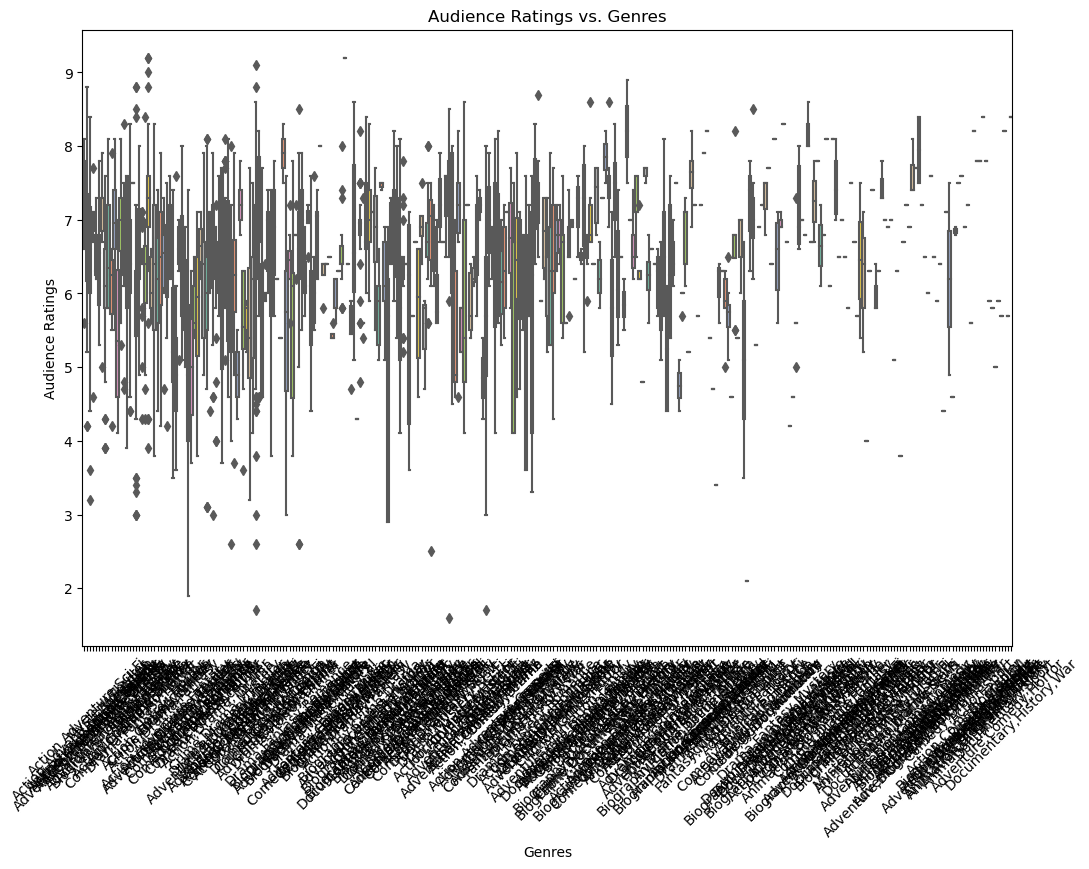

In [59]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='averagerating', data=df, palette='Set2')
plt.title('Audience Ratings vs. Genres')
plt.xlabel('Genres')
plt.ylabel('Audience Ratings')
plt.xticks(rotation=45)
plt.show()

In [60]:
# Interpret the box plot
'''

The genres are represented on the X-axis. Each box corresponds to a specific genre.

The Y-axis represents the Audience Ratings, which is the variable of interest.

The heights of the boxes represent the interquartile range (IQR) for each genre. A taller box indicates a larger spread of audience ratings within that genre.

The line inside each box represents the median audience rating for the corresponding genre.

The whiskers extend from the boxes and indicate the range of audience ratings, excluding outliers.

Individual data points beyond the whiskers are considered outliers. These could be movies that received exceptionally high or low ratings within a genre.

'''

'\n\nThe genres are represented on the X-axis. Each box corresponds to a specific genre.\n\nThe Y-axis represents the Audience Ratings, which is the variable of interest.\n\nThe heights of the boxes represent the interquartile range (IQR) for each genre. A taller box indicates a larger spread of audience ratings within that genre.\n\nThe line inside each box represents the median audience rating for the corresponding genre.\n\nThe whiskers extend from the boxes and indicate the range of audience ratings, excluding outliers.\n\nIndividual data points beyond the whiskers are considered outliers. These could be movies that received exceptionally high or low ratings within a genre.\n\n'

### Popularity vs. Genre:
Here we will explore how the popularity of movies varies across different genres using a scatter plot to identify the genres that tend to be more popular.

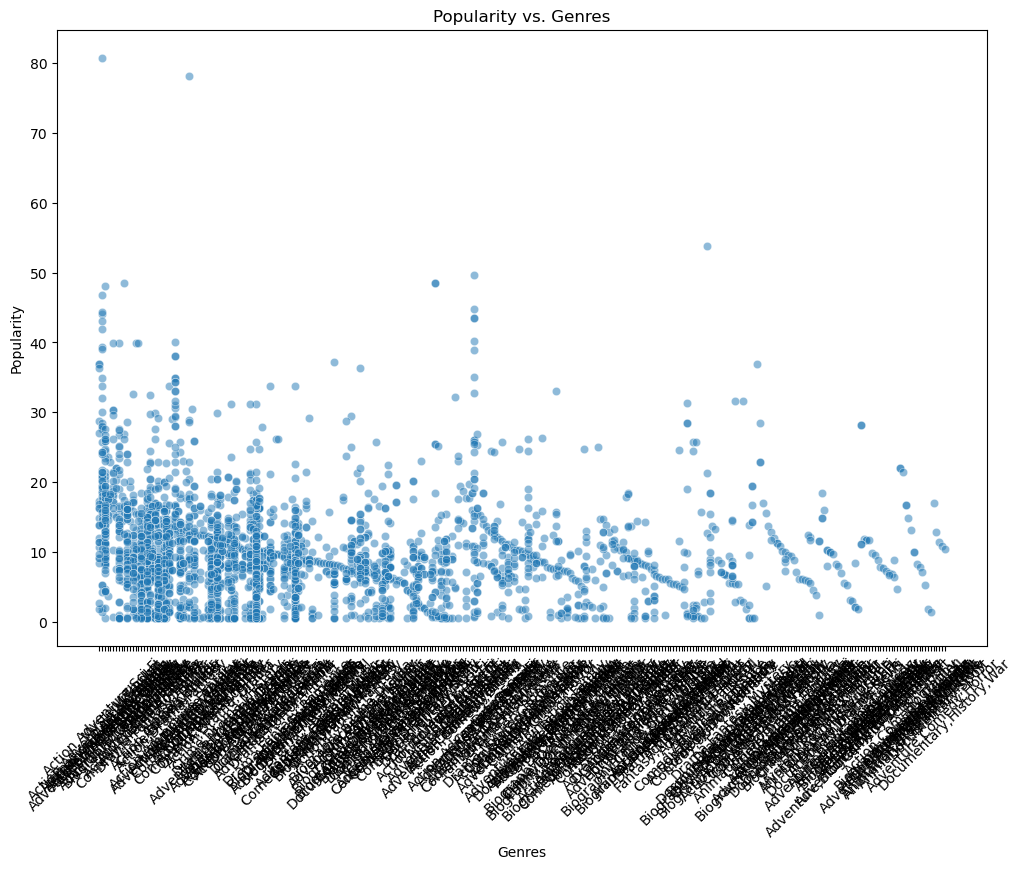

In [62]:
# Scatter plot for popularity vs. genre
plt.figure(figsize=(12, 8))
sns.scatterplot(x='genres', y='popularity', data=df, alpha=0.5)
plt.title('Popularity vs. Genres')
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

In [64]:
# Interpret the scatter plot above
'''

Points higher on the y-axis indicate movies with higher popularity scores.
Genres with a cluster of points towards the upper end suggest that movies in those genres tend to be more popular.
The spread of points across genres indicates the variability in popularity within each genre.
Clusters or patterns of points reveal genres that consistently attract higher or lower popularity.

'''

'\n\nPoints higher on the y-axis indicate movies with higher popularity scores.\nGenres with a cluster of points towards the upper end suggest that movies in those genres tend to be more popular.\nThe spread of points across genres indicates the variability in popularity within each genre.\nClusters or patterns of points reveal genres that consistently attract higher or lower popularity.\n\n'

### Vote Average vs. Genre:
We shall investigate the relationship between vote averages and genres using a box plot to help identify genres with higher or more consistent vote averages.

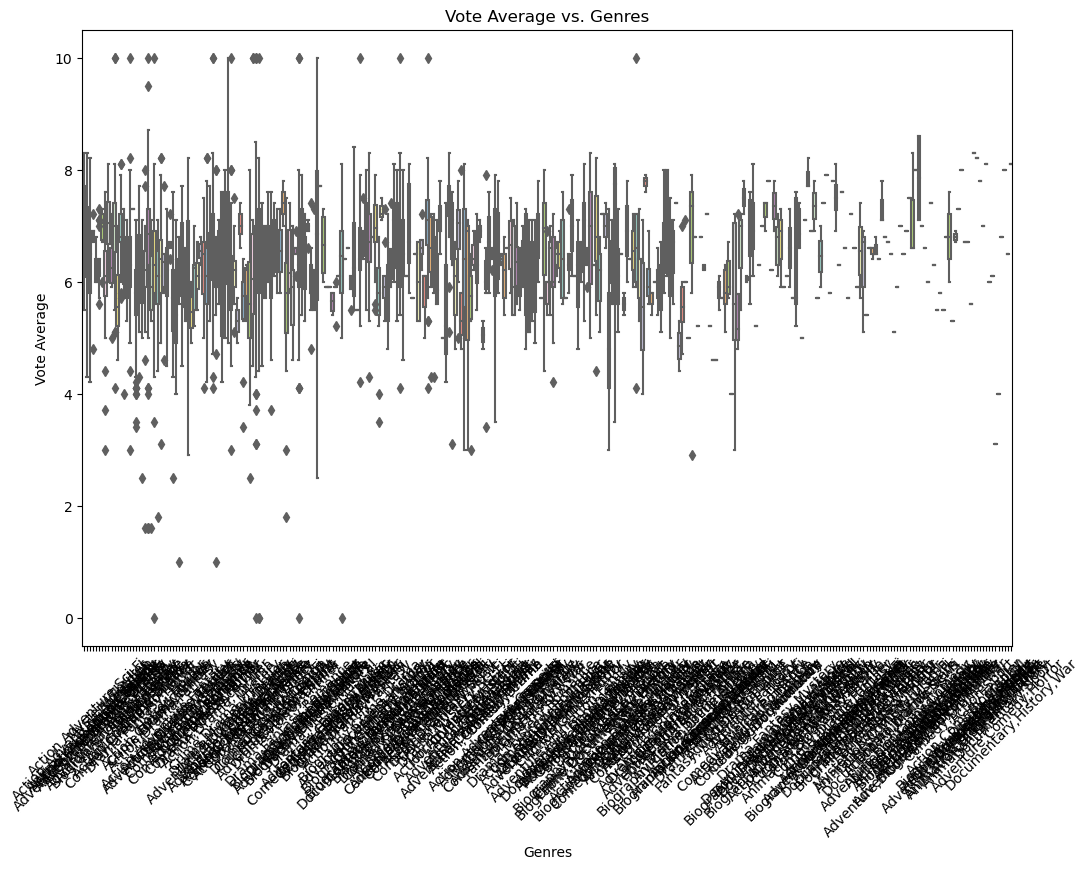

In [63]:
# Box plot for vote average vs. genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='vote_average', data=df, palette='Set3')
plt.title('Vote Average vs. Genres')
plt.xlabel('Genres')
plt.ylabel('Vote Average')
plt.xticks(rotation=45)
plt.show()

In [67]:
# Interpret the box plot above
'''

The box itself represents the interquartile range (IQR) of popularity scores within a genre. The central line inside the box is the median.
The whiskers extend to the minimum and maximum values within a certain range (usually 1.5 times the IQR).
Points beyond the whiskers are considered outliers.
Boxes higher on the y-axis indicate genres with higher median popularity scores.
Genres with boxes shifted upward suggest movies that generally receive higher popularity scores.
The spread of boxes across genres indicates variability in popularity scores within each genre.
Narrower boxes suggest less variability, while wider boxes indicate more variability.

The box plot helps Microsoft gain insights into audience preferences regarding the popularity of movies across different genres, aiding in decision-making for movie production.

'''

'\n\nThe box itself represents the interquartile range (IQR) of popularity scores within a genre. The central line inside the box is the median.\nThe whiskers extend to the minimum and maximum values within a certain range (usually 1.5 times the IQR).\nPoints beyond the whiskers are considered outliers.\nBoxes higher on the y-axis indicate genres with higher median popularity scores.\nGenres with boxes shifted upward suggest movies that generally receive higher popularity scores.\nThe spread of boxes across genres indicates variability in popularity scores within each genre.\nNarrower boxes suggest less variability, while wider boxes indicate more variability.\n\nThe box plot helps Microsoft gain insights into audience preferences regarding the popularity of movies across different genres, aiding in decision-making for movie production.\n\n'

### Runtime Minutes vs. Genre:
Here, we analyze how the runtime of movies varies across different genres using scatter plots.

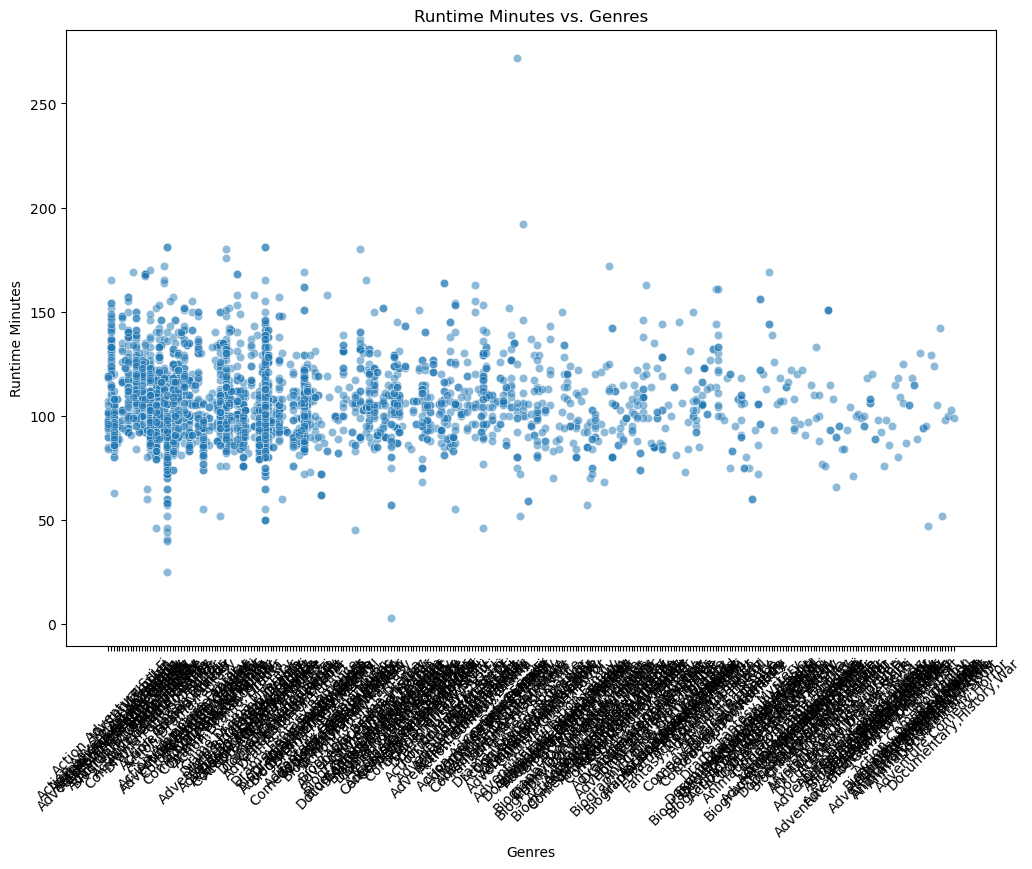

In [65]:
# Scatter plot for runtime minutes vs. genre
plt.figure(figsize=(12, 8))
sns.scatterplot(x='genres', y='runtime_minutes', data=df, alpha=0.5)
plt.title('Runtime Minutes vs. Genres')
plt.xlabel('Genres')
plt.ylabel('Runtime Minutes')
plt.xticks(rotation=45)
plt.show()

In [68]:
# Interpret the scatter plot above
'''

The scattered points help visualize the distribution of movie runtimes within each genre.
Patterns of points within a genre show how the runtime varies for movies in that specific genre.
Points higher on the y-axis indicate longer runtime durations for movies.
Genres with points shifted upward suggest movies that generally have longer runtimes.
The spread of points across genres indicates variability in runtime durations within each genre.
Concentrated or scattered points reveal whether movies in a genre tend to have similar or diverse runtime durations.


'''

'\n\nThe scattered points help visualize the distribution of movie runtimes within each genre.\nPatterns of points within a genre show how the runtime varies for movies in that specific genre.\nPoints higher on the y-axis indicate longer runtime durations for movies.\nGenres with points shifted upward suggest movies that generally have longer runtimes.\nThe spread of points across genres indicates variability in runtime durations within each genre.\nConcentrated or scattered points reveal whether movies in a genre tend to have similar or diverse runtime durations.\n\n\n'

## Conclusions
This analysis leads to three recommendations of what movies Microsoft's new studio should produce:

1. Microsoft should consider prioritizing movie production in popular genres like Drama, Comedy, and Thriller to align with current industry trends and audience preferences.
2. Microsoft should conduct a detailed analysis on genres that exhibit higher domestic gross earnings to guide their focus on genres that are highly popular like Drama and Comedy which have been seen to be more profitable.
3. Microsoft should prioritize genres that receive high audience ratings and are popular, ensuring a positive reception among viewers thus meeting their preferences.

These recommendations aim to guide Microsoft in making strategic decisions regarding the genres it chooses for movie production, with a focus on aligning with audience preferences, maximizing profitability, and creating well-received films in the competitive movie industry.
Stakeholders can leverage this information to optimize decision-making and enhance Microsoft's success.

## Next Steps
Further analyses could yield additional insights to further improve Microsoft's decision-making process in determining what genre of movie to create as explained below:

1. Explore specific sub-genres within popular categories to identify niche opportunities and potential untapped markets.
2. Conduct in-depth audience surveys or engage in focus groups to gain qualitative insights into specific audience preferences and genre popularity.
3. Explore partnerships with acclaimed directors or actors in popular genres to enhance the quality and appeal of movie productions.